Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Read the dataset to the python environment.

In [21]:
#read the data set on python environment 
data = pd.read_excel('iris (4).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2.Do necessary pre-processing steps

In [22]:
#check how many rows and columns are present
data.shape

(150, 5)

In [23]:
# Calculating the null values present in each columns in the dataset
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [24]:
 # Display the data before missing values treatment
data[data.isna().any(axis=1)]   # check at least one null values in a row 

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor


As you can see that there are null values present in the dataset.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From the summary of the data SL,SW,PL and PW are float data type.Classification is object data type

# filling missing values

In [25]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

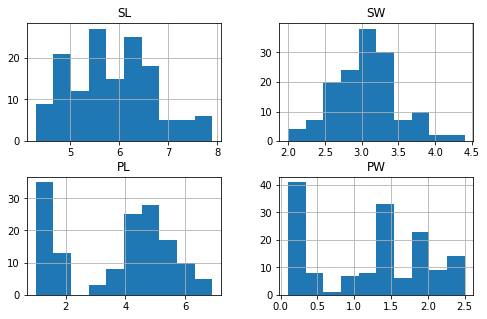

In [26]:
freqgraph =data.select_dtypes(include='float')
freqgraph.hist(figsize=(8,5))
plt.show()

In [27]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [28]:
for i in[  'SL', 'SW','PL']:
    data[i]=data[i].fillna(data[i].median())  

In [16]:
# Calculating the null values present in each columns in the dataset

data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [33]:
#e have a categorical column gender.convert it into numerical value for that e use onehot encoding

data=pd.get_dummies(data)
data

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.8,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SL                              150 non-null    float64
 1   SW                              150 non-null    float64
 2   PL                              150 non-null    float64
 3   PW                              150 non-null    float64
 4   Classification_Iris-setosa      150 non-null    uint8  
 5   Classification_Iris-versicolor  150 non-null    uint8  
 6   Classification_Iris-virginica   150 non-null    uint8  
dtypes: float64(4), uint8(3)
memory usage: 5.3 KB


In [35]:
#e split the data set into features and target 
x = data.drop(['Classification_Iris-setosa'],axis=1)
y=data['Classification_Iris-setosa']

In [36]:
#split the data set into train and test set

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.2)

In [37]:
# check ho many data points are there in training set
x_train.shape

(120, 6)

so 120 data points are given in training and 30 data points are for testing

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# logistic regression model

In [38]:
#logistic regression model is presnt in the sklearn library in the linear model class. first e have to import it

from sklearn.linear_model import LogisticRegression

logit_model=LogisticRegression() #create an instants of the model

logit_model.fit(x_train,y_train) #fit this into xtreain and ytrain to create the model

y_pred=logit_model.predict(x_test) #predict the values in the xtest using this model created

In [39]:
#check hoW our model performed

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score #to determine our performance of our model

In [40]:
print("Accuracy is:" ,accuracy_score(y_test,y_pred))
print("Precision is:", precision_score(y_test,y_pred))
print("Recall is:" ,recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
f1 score is: 1.0


In [ ]:
here  all  are 1%.for a good model accuracy and f1 should be maximum possible

In [41]:
# print the confution matrix and print the value
confusion_matrix(y_test,y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)

so there are 0 miss classification 

In [42]:
#KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# to find optimum K value. to this We have to create a model With varied K values

acc_values=[]
neighbors=np.arange(3,15)

In [45]:
# loop to create KNN model for each K value
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [46]:
acc_values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'accuracy')

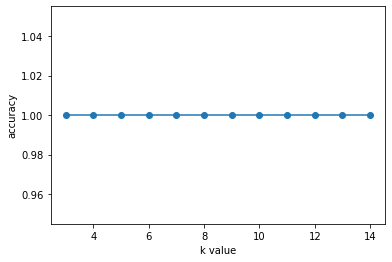

In [48]:
confusion_matrix(y_test,y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)

In [49]:
data.describe()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,0.333333,0.333333,0.333333
std,0.808567,0.421995,1.729424,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.275000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


# standard scailing

In [51]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)

In [52]:
logit_model=LogisticRegression() #create an instants of the model

logit_model.fit(x_train,y_train) #fit this into xtreain and ytrain to create the model

y_pred=logit_model.predict(x_test) #predict the values in the xtest using this model created

In [53]:
print("Accuracy is:" ,accuracy_score(y_test,y_pred))
print("Precision is:", precision_score(y_test,y_pred))
print("Recall is:" ,recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
f1 score is: 1.0


In [54]:
confusion_matrix(y_test,y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)

In [55]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

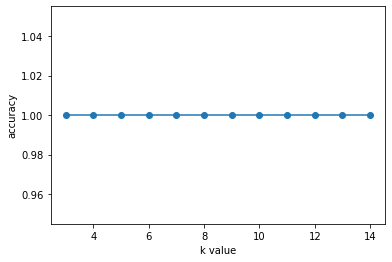

In [56]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [57]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [58]:
print("Accuracy is:" ,accuracy_score(y_test,y_pred))
print("Precision is:", precision_score(y_test,y_pred))
print("Recall is:" ,recall_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
f1 score is: 1.0


array([[20,  0],
       [ 0, 10]], dtype=int64)

All classification model gives the best result to predict iris
species

# Decision Tree Classifier

In [61]:
# implimenting decision tree from sklearn library
from sklearn.tree import DecisionTreeClassifier

In [62]:
# create instance and store it in a variable
dt_model=DecisionTreeClassifier()

In [63]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred=dt_model.predict(x_test)

In [65]:
print('Accuracy on Decision Tree model is',accuracy_score(y_test,y_pred))

Accuracy on Decision Tree model is 1.0


In [66]:
y_test.value_counts()

0    20
1    10
Name: Classification_Iris-setosa, dtype: int64

In [67]:
confusion_matrix(y_test,y_pred)

array([[20,  0],
       [ 0, 10]], dtype=int64)